In [89]:
# importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [90]:
# Load the dataset
df = pd.read_csv('Company_Data.csv')

In [91]:
# EDA
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [92]:
df.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes
399,9.71,134,37,0,27,120,Good,49,16,Yes,Yes


In [93]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [94]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [95]:
df.shape

(400, 11)

In [96]:
data=df.copy()
data['Sales_cat'] = pd.cut(x = data['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


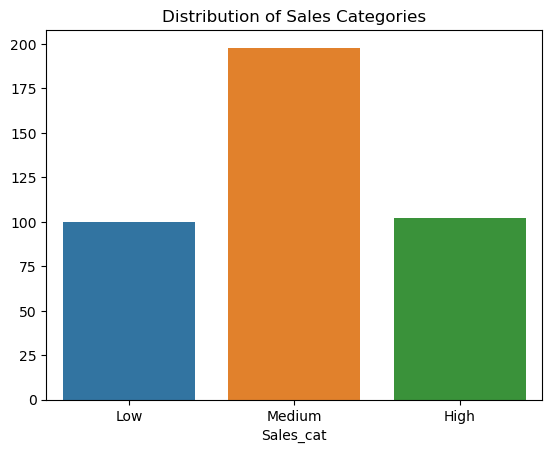

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sales_cat' is the categorical column
sales_counts = data['Sales_cat'].value_counts()

sns.barplot(x=sales_counts.index, y=sales_counts.values)
plt.title('Distribution of Sales Categories')
plt.show()



C:\Users\hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


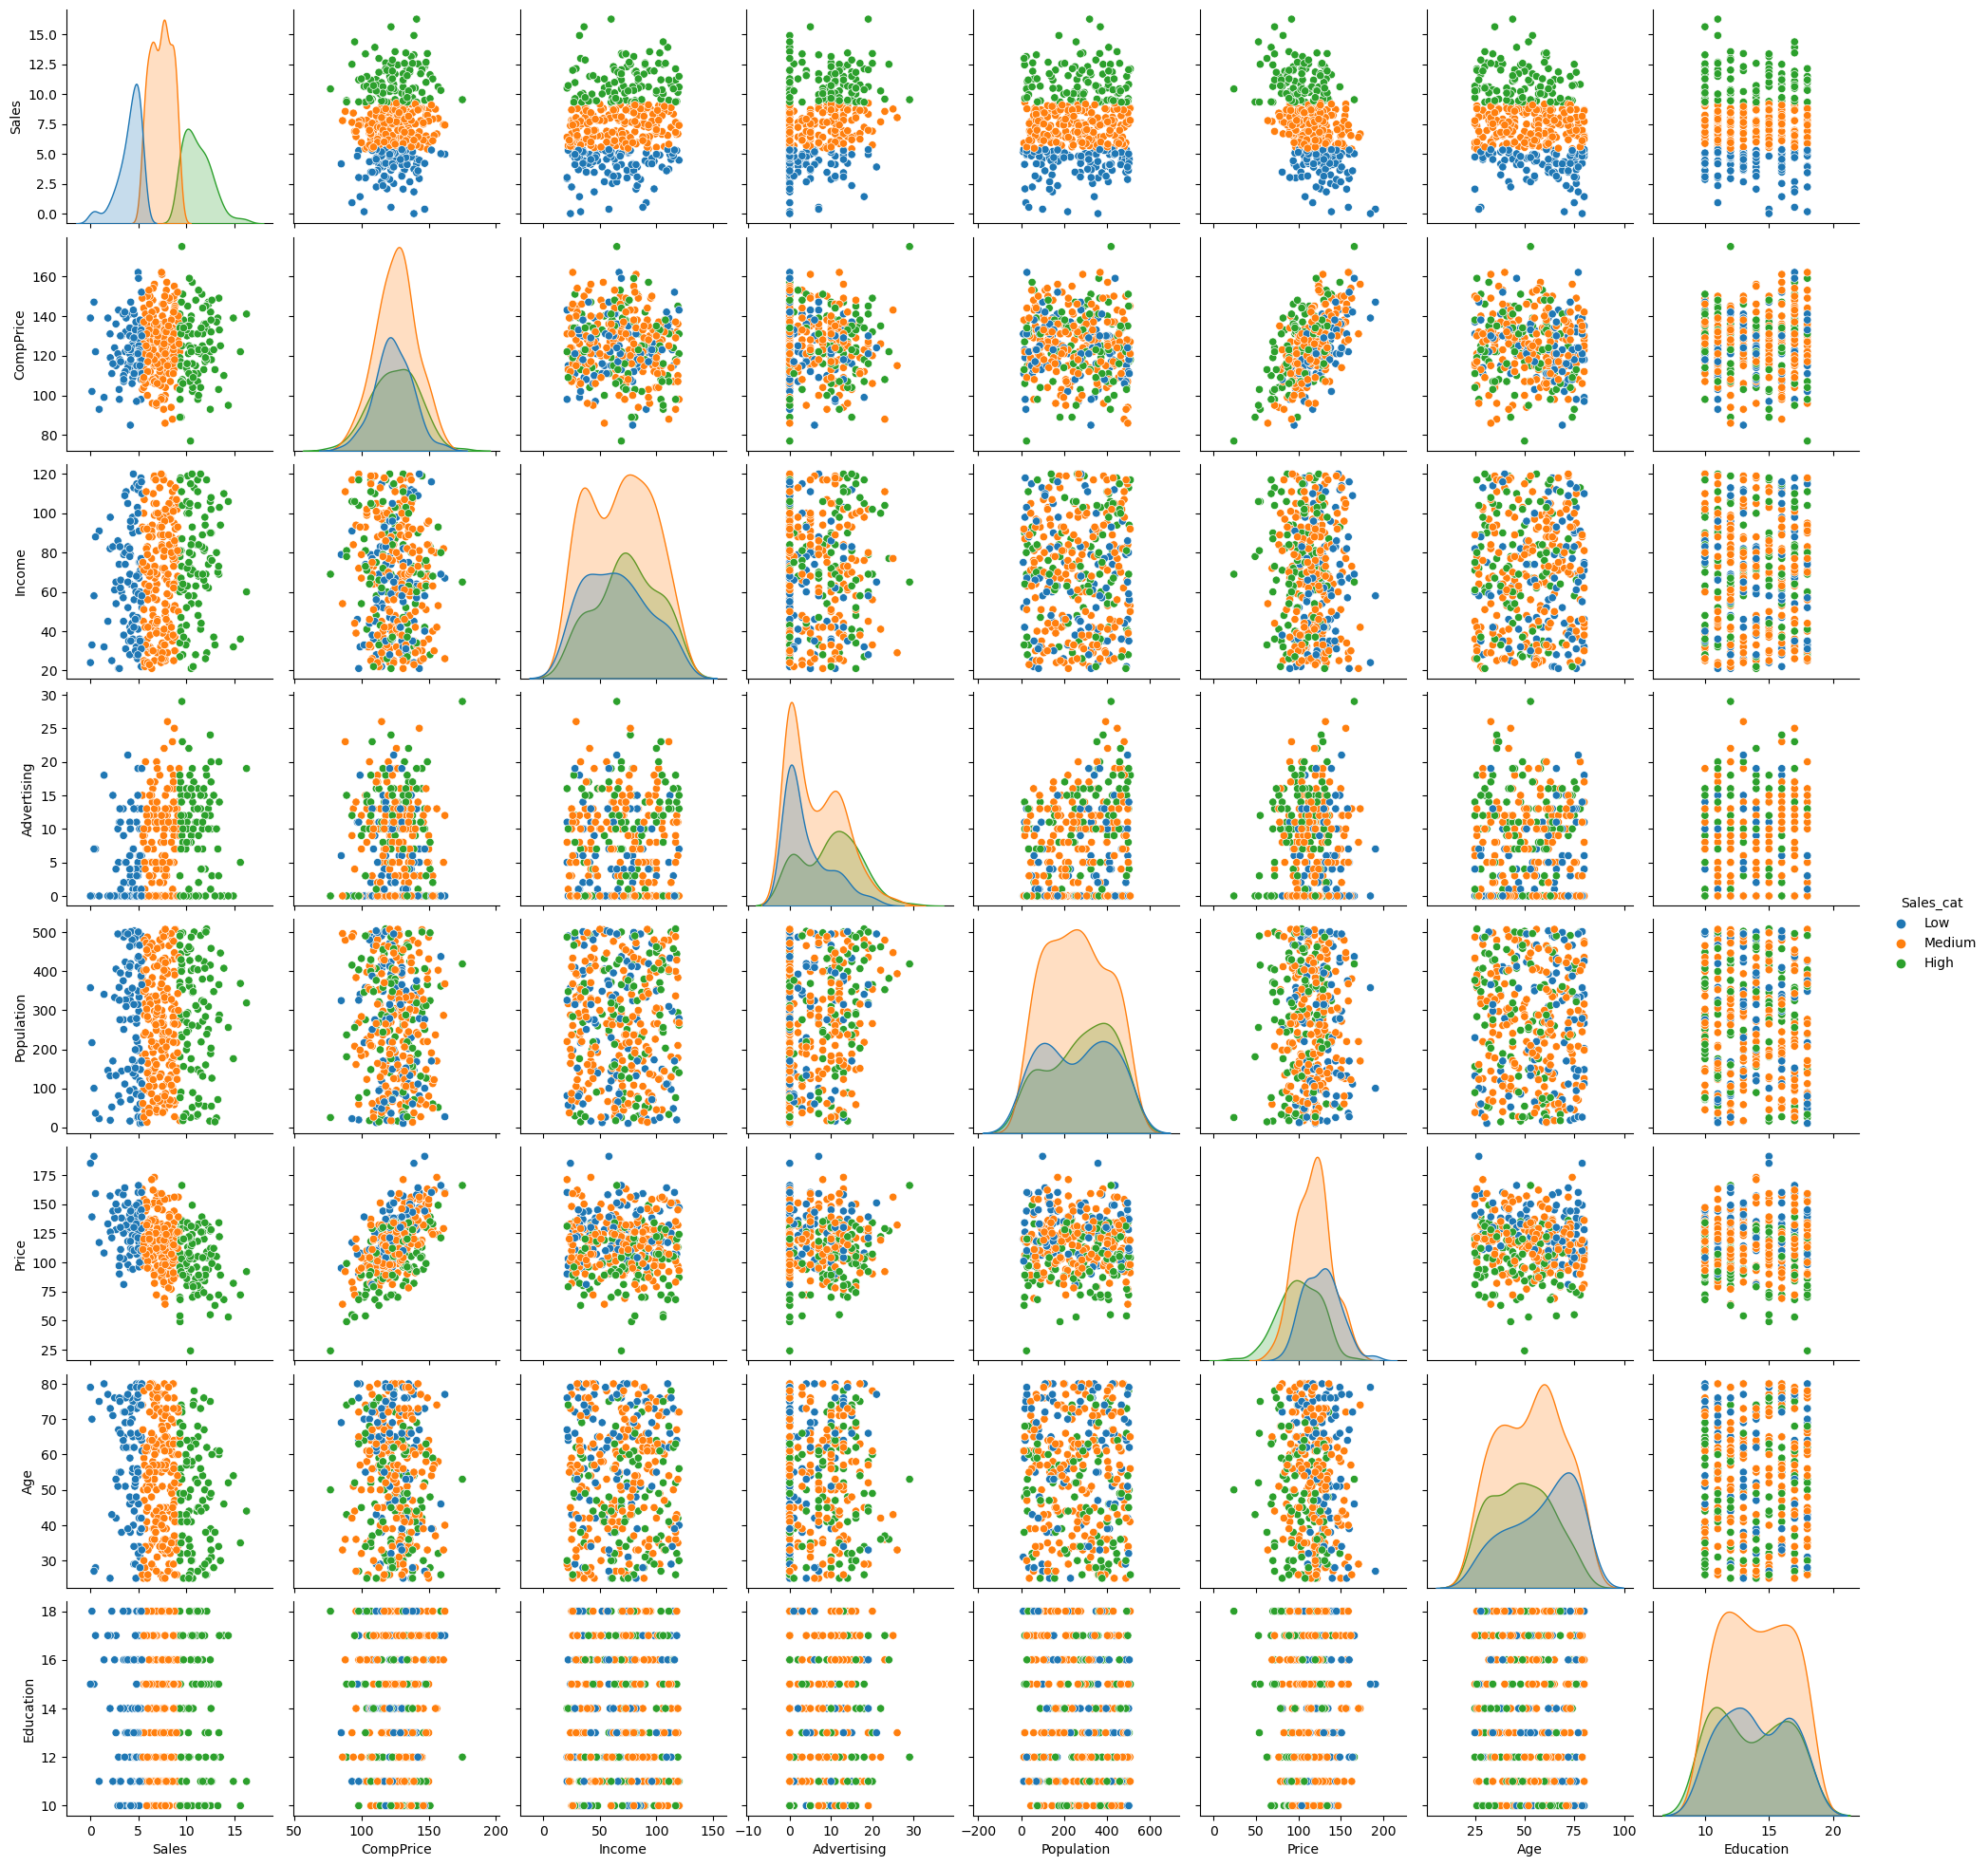

In [98]:
sns.pairplot(data, hue='Sales_cat')
plt.show()


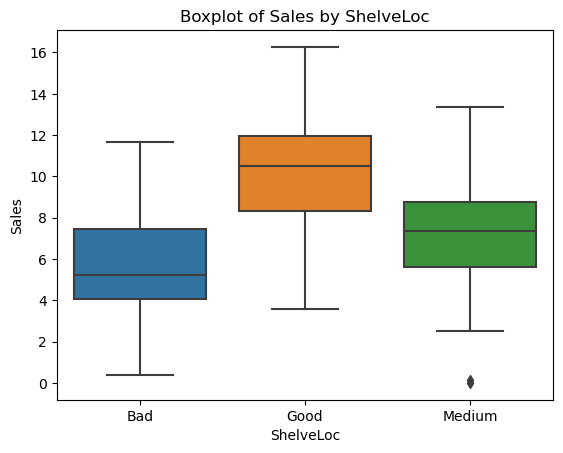

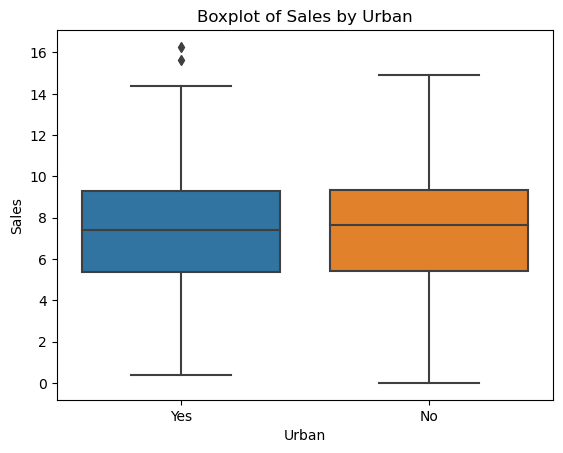

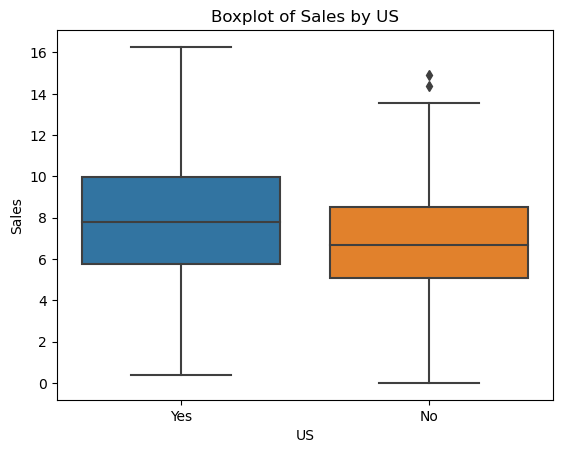

In [99]:
#  relationship between 'Sales' and categorical features
cat_features = ['ShelveLoc', 'Urban', 'US']
for feature in cat_features:
    sns.boxplot(x=feature, y='Sales', data=df)
    plt.title(f'Boxplot of Sales by {feature}')
    plt.show()

In [100]:
categorical_features = data.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [101]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [102]:
data_ = data.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,141,64,3,340,128,38,13,True,False,False,False,True,True,False


In [103]:
boolean_columns = ['ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes']

# Convert boolean values to 0 and 1 in specified columns
data_[boolean_columns] = data_[boolean_columns].astype(int)

print(data_)


     CompPrice  Income  Advertising  Population  Price  Age  Education  \
0          138      73           11         276    120   42         17   
1          111      48           16         260     83   65         10   
2          113      35           10         269     80   59         12   
3          117     100            4         466     97   55         14   
4          141      64            3         340    128   38         13   
..         ...     ...          ...         ...    ...  ...        ...   
395        138     108           17         203    128   33         14   
396        139      23            3          37    120   55         11   
397        162      26           12         368    159   40         18   
398        100      79            7         284     95   50         12   
399        134      37            0          27    120   49         16   

     ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0                1               0

In [104]:
data_['Sales'] = data.Sales_cat
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,High
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,Medium
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,Low


In [105]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [106]:
X = data_.iloc[:,0:14]
y = data_.iloc[:,14]

In [107]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [108]:
y_train.value_counts()


Sales
2    156
0     85
1     79
Name: count, dtype: int64

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)  # Option 2: Remove random_state
num_trees = 50
max_features = 3
rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)


In [110]:
rf_model.fit(x_train2, y_train2)


RandomForestClassifier(max_features=3, n_estimators=50)

In [111]:
results1 = cross_val_score(rf_model, X, y, cv=kfold)


In [112]:
print(results1.mean())

0.6849999999999998


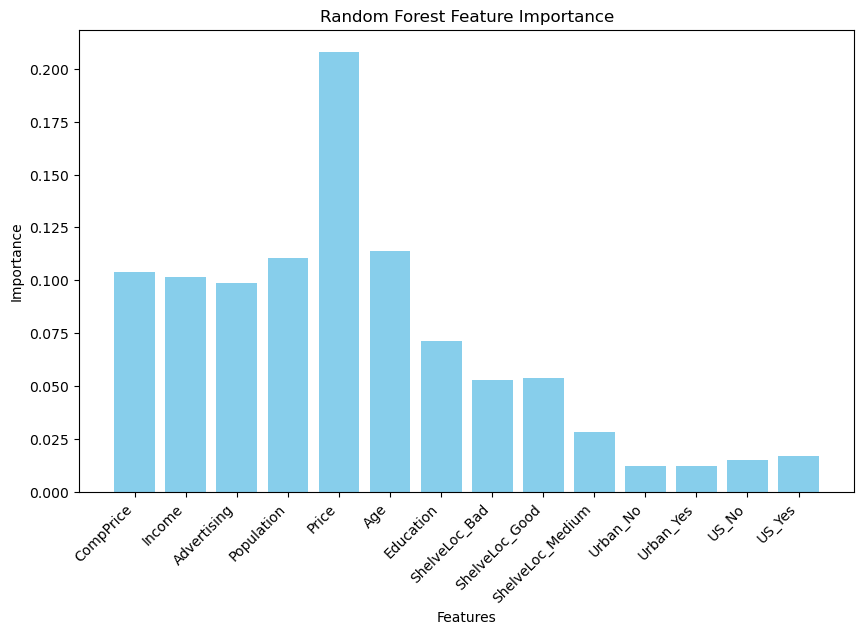

In [113]:
# Feature Importance Plot for Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [114]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [115]:
X = data_.iloc[:,0:14]
y = data_.iloc[:,14]

In [116]:
seed = 7

In [117]:
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 50

# Create BaggingClassifier with DecisionTreeClassifier as the base estimator
model = BaggingClassifier( n_estimators=num_trees, random_state=seed)



In [118]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=seed)


In [119]:
model.fit(x_train2, y_train2)


BaggingClassifier(n_estimators=50, random_state=7)

In [120]:
results_1 = cross_val_score(model2, X, y, cv=kfold)


In [121]:
print(results_1.mean())

0.6075


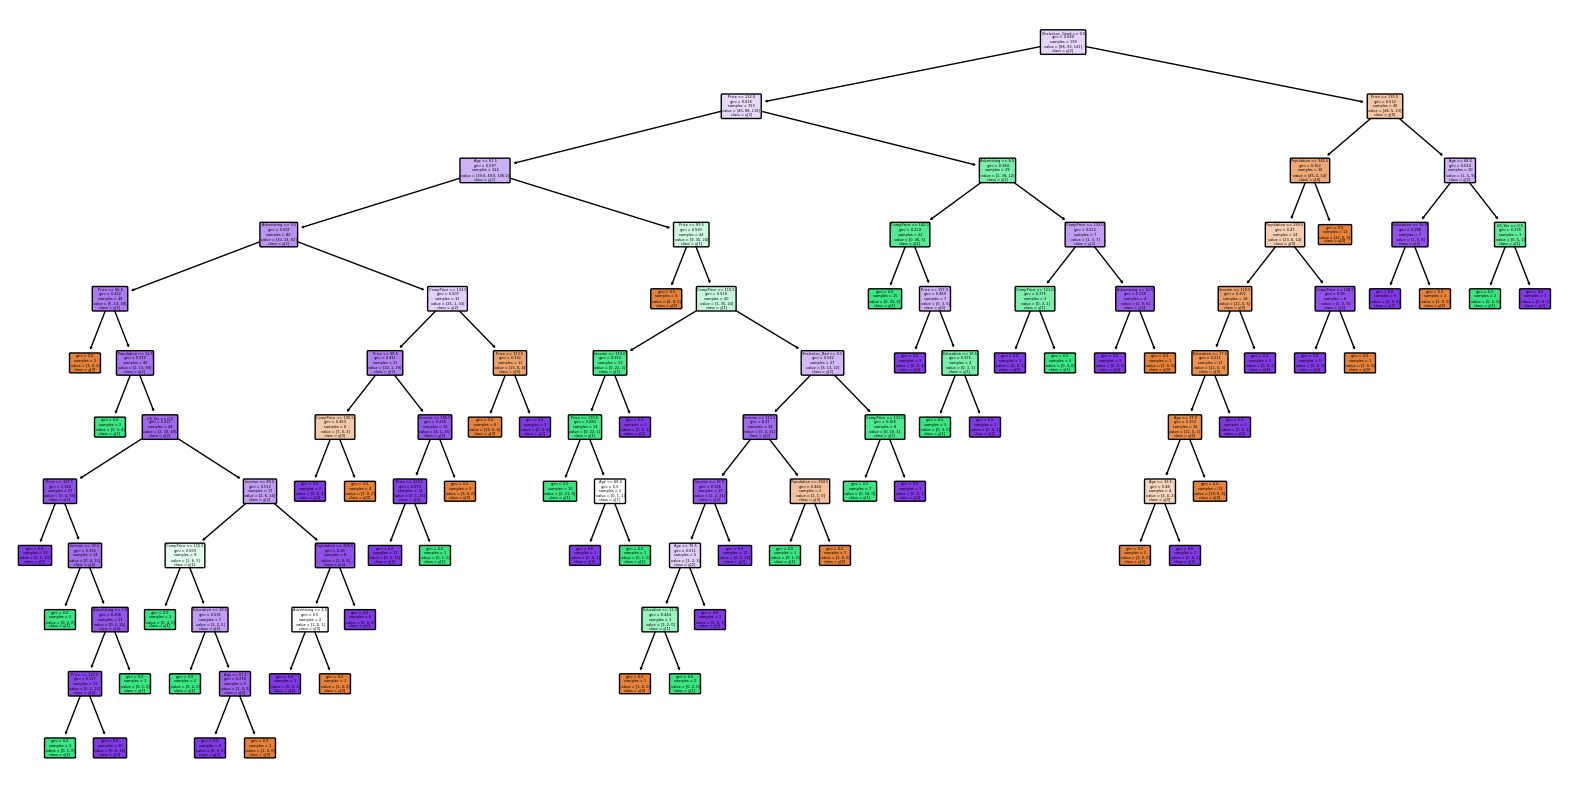

In [130]:
from sklearn.tree import plot_tree
feature_names = x_train.columns
plt.figure(figsize=(20, 10))
plot_tree(model.estimators_[0], feature_names=feature_names, filled=True, rounded=True, class_names=True)
plt.show()

In [122]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy:.2%}')


Accuracy on the test set: 93.75%


In [123]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
X = data_.iloc[:,0:14]
y = data_.iloc[:,14]

num_trees = 10
seed=7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed) 
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed, algorithm='SAMME')



In [124]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=seed)


In [125]:
model2.fit(x_train2, y_train2)


AdaBoostClassifier(algorithm='SAMME', n_estimators=10, random_state=7)

In [126]:
results = cross_val_score(model2, X, y, cv=kfold)


In [127]:
print(results.mean())

0.6075


In [128]:
y_pred2 = model2.predict(x_test2)
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy on the test set for AdaBoost: {accuracy2:.2%}')

Accuracy on the test set for AdaBoost: 61.25%
